<a href="https://colab.research.google.com/github/OmPatel1891/Aqua-Terra-Classification/blob/main/Aqua_Terra_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.5654 - loss: 1.1602 - val_accuracy: 0.6000 - val_loss: 0.7048
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5652 - loss: 0.7277 - val_accuracy: 0.6267 - val_loss: 0.6579
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6231 - loss: 0.6410 - val_accuracy: 0.6000 - val_loss: 0.6092
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6828 - loss: 0.5885 - val_accuracy: 0.8133 - val_loss: 0.6064
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7114 - loss: 0.5785 - val_accuracy: 0.9067 - val_loss: 0.5816
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.7474 - loss: 0.5641 - val_accuracy: 0.6400 - val_loss: 0.5487
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7240 - loss: 0.5371 - val_accuracy: 0.8400 - val_loss: 0.5355
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7362 - loss: 0.5249 - val_accuracy: 0.7733 - val_loss:

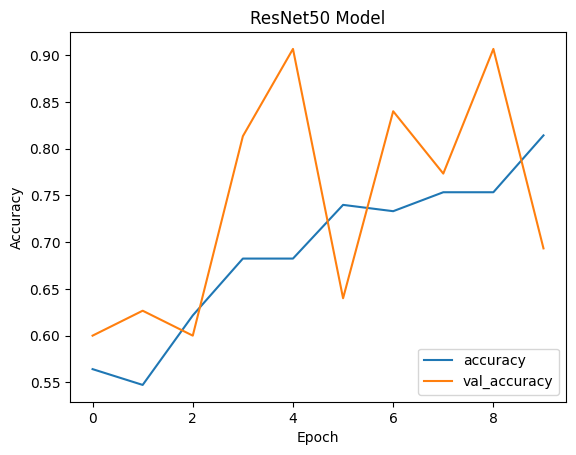

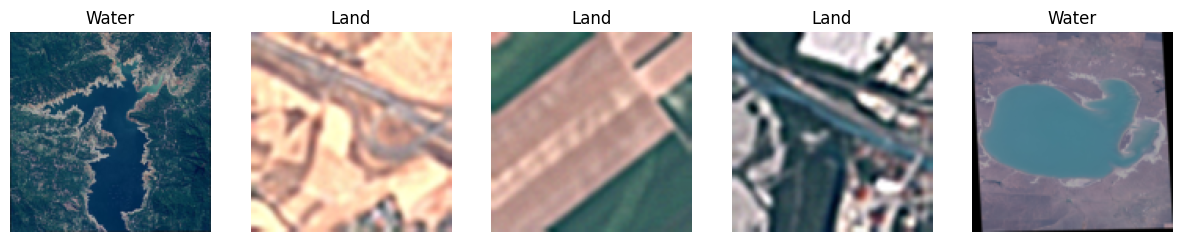

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import random
import cv2

# Function to load and preprocess images
def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # assuming images are in jpg format
            image = io.imread(os.path.join(directory, filename))

            # Denoising the image using Gaussian blur
            if denoise:
                image = cv2.GaussianBlur(image, (5, 5), 0)

            # Sharpening the image using OpenCV
            if sharpen:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR color format
                image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening filter
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert back to RGB

            # Resize the image
            image = transform.resize(image, img_size)
            images.append(image)
            # Assuming filename contains "water" for water images and "land" for land images
            labels.append(1 if "water" in filename else 0)
    return np.array(images), np.array(labels)

# Load images and labels with denoising and sharpening
images, labels = load_images("/content/drive/MyDrive/new mv report/new data", denoise=True, sharpen=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load pre-trained ResNet50 model without including the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_pred_prob).flatten()

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('ResNet50 Model')
plt.legend(loc='lower right')
plt.show()

# Select random indices for sample images
sample_indices = random.sample(range(len(images)), 5)

# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    if labels[idx] == 1:
        plt.title("Water")
    else:
        plt.title("Land")
    plt.axis('off')
plt.show()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5575 - loss: 1.3440 - val_accuracy: 0.8077 - val_loss: 0.6159
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.8568 - loss: 0.3946 - val_accuracy: 0.7692 - val_loss: 0.7559
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9161 - loss: 0.2011 - val_accuracy: 0.9231 - val_loss: 0.5548
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9660 - loss: 0.1215 - val_accuracy: 0.9231 - val_loss: 0.7504
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9384 - loss: 0.1418 - val_accuracy: 0.9231 - val_loss: 0.6249
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9665 - loss: 0.0672 - val_accuracy: 0.9231 - val_loss: 0.6542
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 0.9615 - val_loss: 0.7617
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9847 - loss: 0.0445 - val_

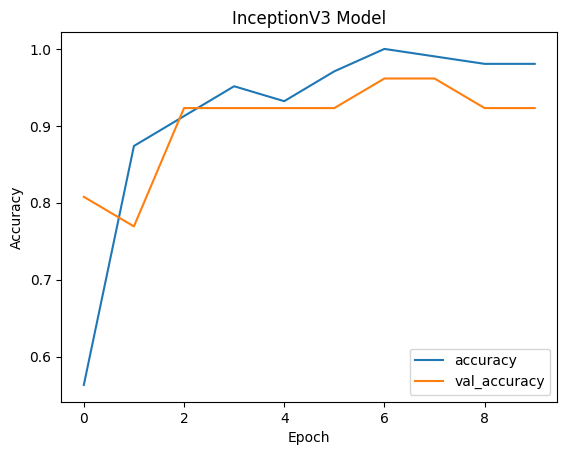

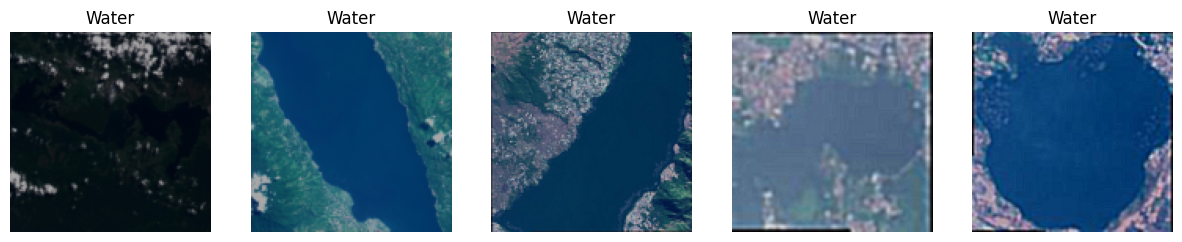

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import random
import cv2

# Function to load and preprocess images
def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # assuming images are in jpg format
            image = io.imread(os.path.join(directory, filename))

            # Denoising the image using Gaussian blur
            if denoise:
                image = cv2.GaussianBlur(image, (5, 5), 0)

            # Sharpening the image using OpenCV
            if sharpen:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR color format
                image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening filter
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert back to RGB

            # Resize the image
            image = transform.resize(image, img_size)
            images.append(image)
            # Assuming filename contains "water" for water images and "land" for land images
            labels.append(1 if "water" in filename else 0)
    return np.array(images), np.array(labels)

# Load images and labels with denoising and sharpening
images, labels = load_images("/content/drive/MyDrive/new mv report/new data", denoise=True, sharpen=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load pre-trained InceptionV3 model without including the top (fully connected) layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_pred_prob).flatten()

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('InceptionV3 Model')
plt.legend(loc='lower right')
plt.show()

# Select random indices for sample images
sample_indices = random.sample(range(len(images)), 5)

# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    if labels[idx] == 1:
        plt.title("Water")
    else:
        plt.title("Land")
    plt.axis('off')
plt.show()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 924ms/step - accuracy: 0.5011 - loss: 8.0535 - val_accuracy: 0.8077 - val_loss: 6.0007 - learning_rate: 0.0010
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 613ms/step - accuracy: 0.9301 - loss: 4.4310 - val_accuracy: 0.8462 - val_loss: 4.7036 - learning_rate: 0.0010
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 780ms/step - accuracy: 0.9688 - loss: 3.5215 - val_accuracy: 0.8462 - val_loss: 4.4960 - learning_rate: 0.0010
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 419ms/step - accuracy: 0.9563 - loss: 3.3553 - val_accuracy: 0.8077 - val_loss: 4.9290 - learning_rate: 0.0010
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 603ms/step - accuracy: 1.0000 - loss: 2.8444 - val_accuracy: 0.8846 - val_loss: 4.0089 - learning_rate: 0.0010
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 427ms/step - accuracy: 0.9818 - loss: 2.7521 - val_accuracy: 0.9231 - val_loss: 3.1647 - learning_rate: 0.0010
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 421ms/step - accuracy: 0.9727 - loss: 2.6660 - val_accuracy: 

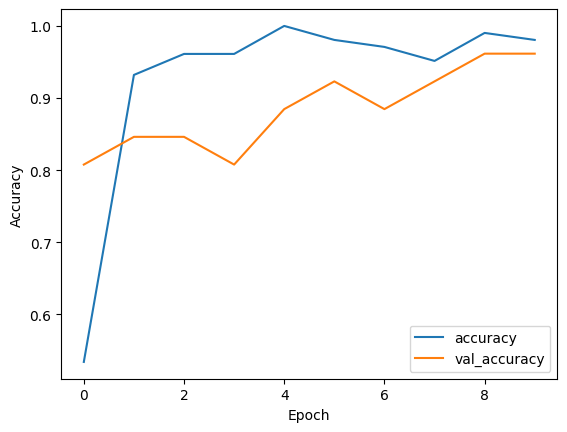

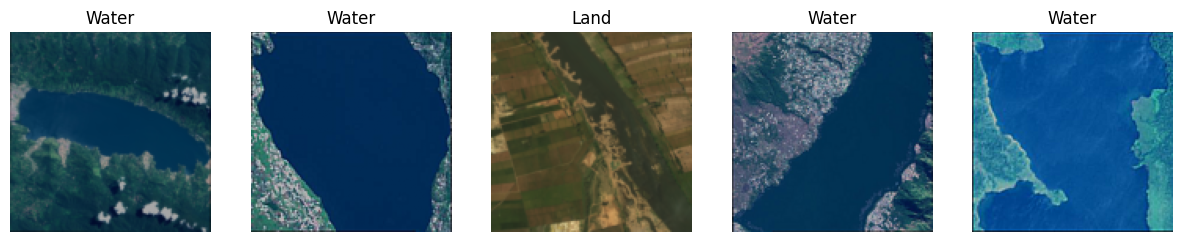

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import random
import cv2

# Function to load and preprocess images
def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # assuming images are in jpg format
            image = io.imread(os.path.join(directory, filename))

            # Denoising the image using Gaussian blur
            if denoise:
                image = cv2.GaussianBlur(image, (5, 5), 0)

            # Sharpening the image using OpenCV
            if sharpen:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR color format
                image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening filter
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert back to RGB

            # Resize the image
            image = transform.resize(image, img_size)
            images.append(image)
            # Assuming filename contains "water" for water images and "land" for land images
            labels.append(1 if "water" in filename else 0)
    return np.array(images), np.array(labels)

# Load images and labels with denoising and sharpening
images, labels = load_images("/content/drive/MyDrive/new mv report/new data", denoise=True, sharpen=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load pre-trained MobileNetV2 model without including the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
from tensorflow.keras.regularizers import l2
x = Flatten()(base_model.output)
x = Dense(256, activation='relu',kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
'''model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])'''

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),callbacks=[lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
# land (0) if probability >= 0.5, water (1) if probability < 0.5
y_pred = np.where(y_pred_prob >= 0.5, 0, 1)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Select random indices for sample images
sample_indices = random.sample(range(len(images)), 5)

# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    if labels[idx] == 1:
        plt.title("Water")
    else:
        plt.title("Land")
    plt.axis('off')
plt.show()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 42s 9s/step - accuracy: 0.5593 - loss: 9.8180 - val_accuracy: 0.5769 - val_loss: 82.0294 - learning_rate: 0.0010
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.8910 - loss: 9.1209 - val_accuracy: 0.5385 - val_loss: 89.2244 - learning_rate: 0.0010
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.8806 - loss: 12.5216 - val_accuracy: 0.5385 - val_loss: 100.6684 - learning_rate: 0.0010
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.7952 - loss: 15.2872 - val_accuracy: 0.5385 - val_loss: 106.4355 - learning_rate: 0.0010
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.9940 - loss: 7.1999 - val_accuracy: 0.5385 - val_loss: 106.8799 - learning_rate: 5.0000e-04
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 8s/step - accuracy: 0.9847 - loss: 7.9377 - val_accuracy: 0.5385 - val_loss: 97.1915 - learning_rate: 5.0000e-04
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 8s/step - accuracy: 0.9563 - loss: 8.2219 - val_accur

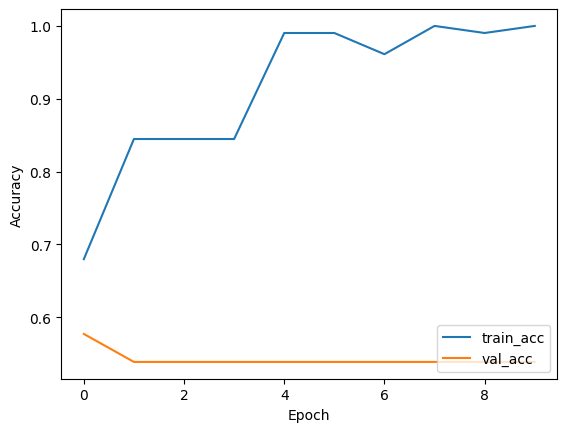

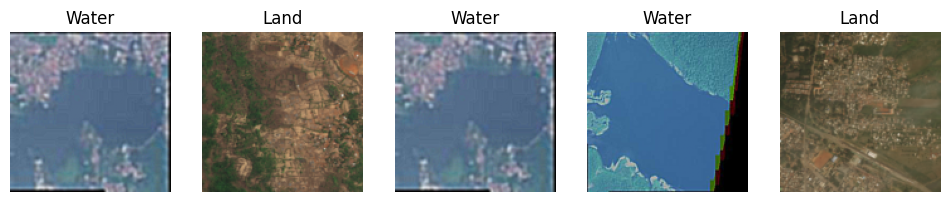

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2
from skimage import io, transform
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images, labels = [], []
    for fname in os.listdir(directory):
        if not fname.lower().endswith(".jpg"):
            continue
        img = io.imread(os.path.join(directory, fname))
        if denoise:
            img = cv2.GaussianBlur(img, (5, 5), 0)
        if sharpen:
            bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            kernel = np.array([[-1, -1, -1],
                               [-1,  9, -1],
                               [-1, -1, -1]])
            bgr = cv2.filter2D(bgr, -1, kernel)
            img = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        img = transform.resize(img, img_size)
        images.append(img)
        labels.append(1 if "water" in fname.lower() else 0)
    return np.array(images), np.array(labels)

DATA_DIR = "/content/drive/MyDrive/new mv report/new data"
images, labels = load_images(DATA_DIR, denoise=True, sharpen=True)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)


def transformer_encoder(x, head_size, num_heads, ff_dim, dropout=0.1):
    input_dim = int(x.shape[-1])

    x_norm = layers.LayerNormalization(epsilon=1e-6)(x)
    attn = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x_norm, x_norm)
    attn = layers.Dropout(dropout)(attn)
    res1 = layers.Add()([x, attn])


    x_norm2 = layers.LayerNormalization(epsilon=1e-6)(res1)
    ff = layers.Dense(ff_dim, activation="relu")(x_norm2)
    ff = layers.Dropout(dropout)(ff)

    ff = layers.Dense(input_dim)(ff)
    return layers.Add()([res1, ff])

def build_hybrid_cnn_vit(input_shape=(128,128,3)):
    inp = Input(shape=input_shape)
    x = layers.Conv2D(32, 3, strides=2, padding="same", activation="relu")(inp)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, strides=2, padding="same", activation="relu")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Reshape((32*32, 64))(x)
    x = transformer_encoder(x, head_size=16, num_heads=4, ff_dim=128, dropout=0.1)

    x = layers.Flatten()(x)
    x = layers.Dense(
        256, activation='relu',
        kernel_regularizer=tf.keras.regularizers.l2(0.01)
    )(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(1, activation='sigmoid')(x)
    return models.Model(inputs=inp, outputs=out)


model = build_hybrid_cnn_vit((128,128,3))
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
lr_sched = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32,
    callbacks=[lr_sched]
)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")
y_prob = model.predict(X_test)
y_pred = (y_prob >= 0.5).astype(int).flatten()
print("Precision:", precision_score(y_test, y_pred))
print("Recall:   ", recall_score(y_test, y_pred))
print("F1-score: ", f1_score(y_test, y_pred))

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

sample_idxs = random.sample(range(len(images)), 5)
plt.figure(figsize=(12,4))
for i, idx in enumerate(sample_idxs):
    plt.subplot(1,5,i+1)
    plt.imshow(images[idx])
    plt.title("Water" if labels[idx]==1 else "Land")
    plt.axis('off')
plt.show()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 84s 19s/step - accuracy: 0.5240 - loss: 1.2875 - val_accuracy: 0.5769 - val_loss: 6.9435
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 89s 20s/step - accuracy: 0.5326 - loss: 4.1719 - val_accuracy: 0.5769 - val_loss: 0.6883
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 83s 20s/step - accuracy: 0.5448 - loss: 0.6975 - val_accuracy: 0.5769 - val_loss: 0.9762
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 140s 20s/step - accuracy: 0.5970 - loss: 0.8153 - val_accuracy: 0.5769 - val_loss: 0.7334
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 80s 19s/step - accuracy: 0.6204 - loss: 0.6586 - val_accuracy: 0.5769 - val_loss: 0.6707
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.6331 - loss: 0.6690 - val_accuracy: 0.5769 - val_loss: 0.6305
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 88s 21s/step - accuracy: 0.5944 - loss: 0.6094 - val_accuracy: 0.6154 - val_loss: 0.5481
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 140s 20s/step - accuracy: 0.7963 - loss: 0.4897 - val_accuracy: 0.8077 - val_loss: 0.374

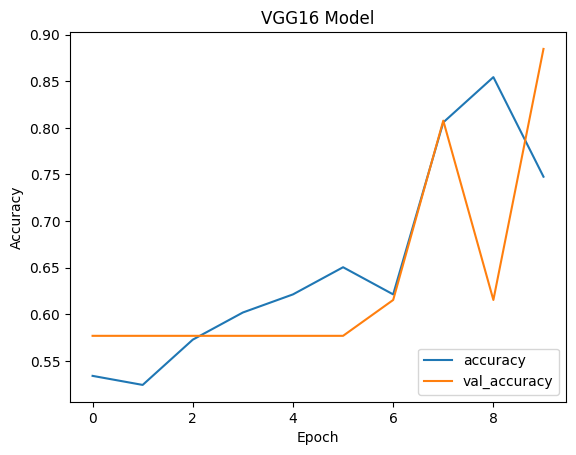

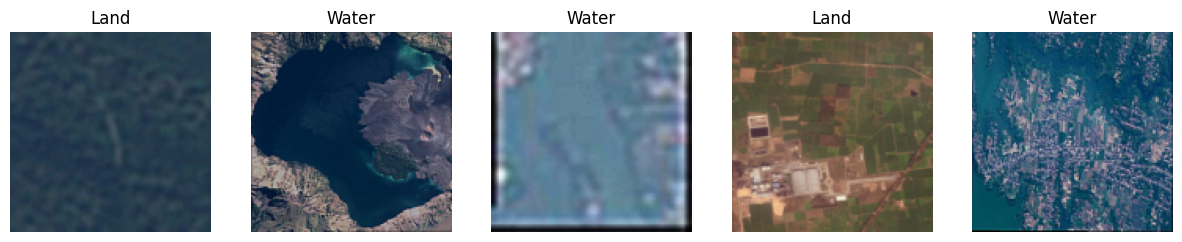

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io, transform
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import random

# Function to load and preprocess images
from skimage.filters import laplace

# Function to load and preprocess images including sharpening
import cv2

# Function to load and preprocess images
def load_images(directory, img_size=(128, 128), sharpen=True, denoise=True):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):  # assuming images are in jpg format
            image = io.imread(os.path.join(directory, filename))

            # Denoising the image using Gaussian blur
            if denoise:
                image = cv2.GaussianBlur(image, (5, 5), 0)

            # Sharpening the image using OpenCV
            if sharpen:
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # OpenCV uses BGR color format
                image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))  # Sharpening filter
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert back to RGB

            # Resize the image
            image = transform.resize(image, img_size)
            images.append(image)
            # Assuming filename contains "water" for water images and "land" for land images
            labels.append(1 if "water" in filename else 0)
    return np.array(images), np.array(labels)

# Load images and labels with denoising and sharpening
images, labels = load_images("/content/drive/MyDrive/new mv report/new data", denoise=True, sharpen=True)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Load pre-trained VGG16 model without including the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the convolutional layers so they are not trainable
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Add custom top layers for binary classification
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy*100,"%")

from sklearn.metrics import precision_score, recall_score, f1_score

# Predict probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_pred_prob).flatten()

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('VGG16 Model')
plt.legend(loc='lower right')
plt.show()

# Select random indices for sample images
sample_indices = random.sample(range(len(images)), 5)

# Plot sample images
plt.figure(figsize=(15, 7))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[idx])
    if labels[idx] == 1:
        plt.title("Water")
    else:
        plt.title("Land")
    plt.axis('off')
plt.show()


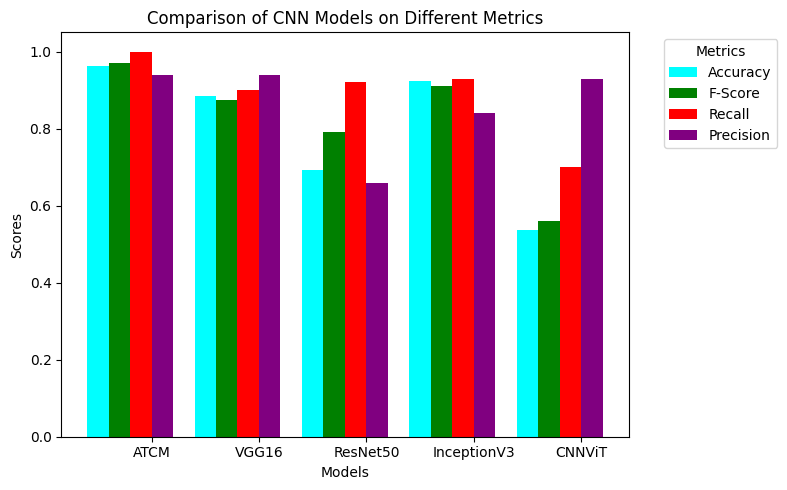

In [5]:
import matplotlib.pyplot as plt
import numpy as np

models = ['ATCM', 'VGG16', 'ResNet50', 'InceptionV3', 'CNNViT']
accuracy = [0.962, 0.884, 0.6934, 0.923, 0.538]
f1_score = [0.97, 0.875, 0.79, 0.91, 0.56]
precision = [0.94, 0.94, 0.66, 0.84, 0.93]
recall = [1.0, 0.9, 0.92, 0.93, 0.70]


metrics_data = [accuracy, f1_score, recall, precision]
metrics_labels = ['Accuracy', 'F-Score', 'Recall', 'Precision']
colors = ['cyan', 'green', 'red', 'purple', 'orange']

x = np.arange(len(models))
bar_width = 0.2

fig, ax = plt.subplots(figsize=(8, 5))

for i in range(len(metrics_data)):
    ax.bar(x + i * bar_width, metrics_data[i], width=bar_width, label=metrics_labels[i], color=colors[i])

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of CNN Models on Different Metrics')
ax.set_xticks(x + bar_width * 2.5)
ax.set_xticklabels(models)
ax.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
